In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [4]:
df = pd.read_csv("D:\Dataset\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

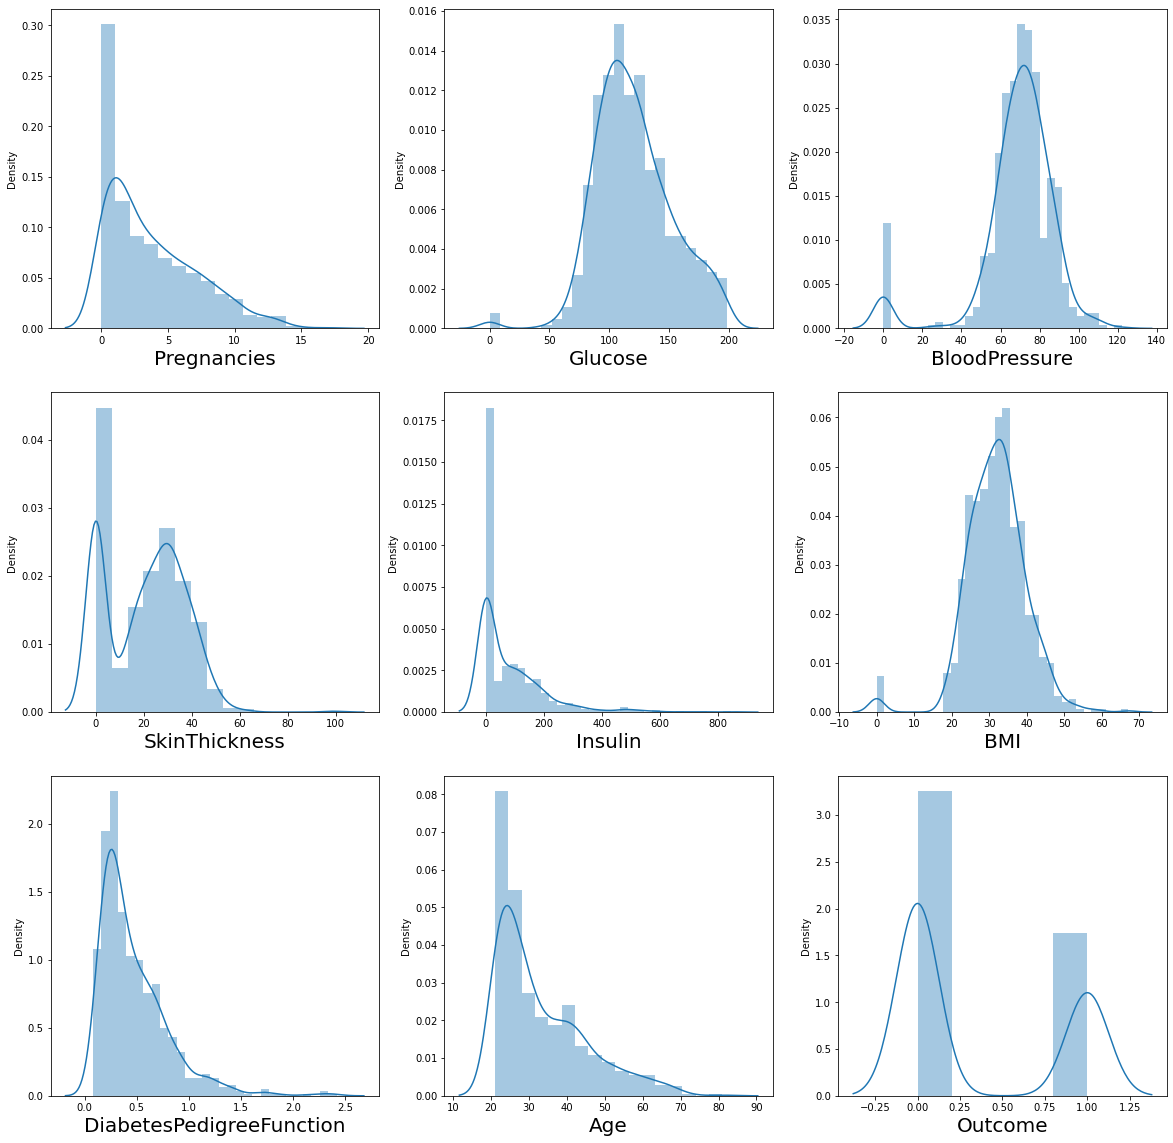

In [8]:
plt.figure(figsize = (20,20), facecolor = 'white')
pl = 1

for column in df:
    if pl<=9:
        ax = plt.subplot(3,3,pl)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    pl+=1
plt.show()

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


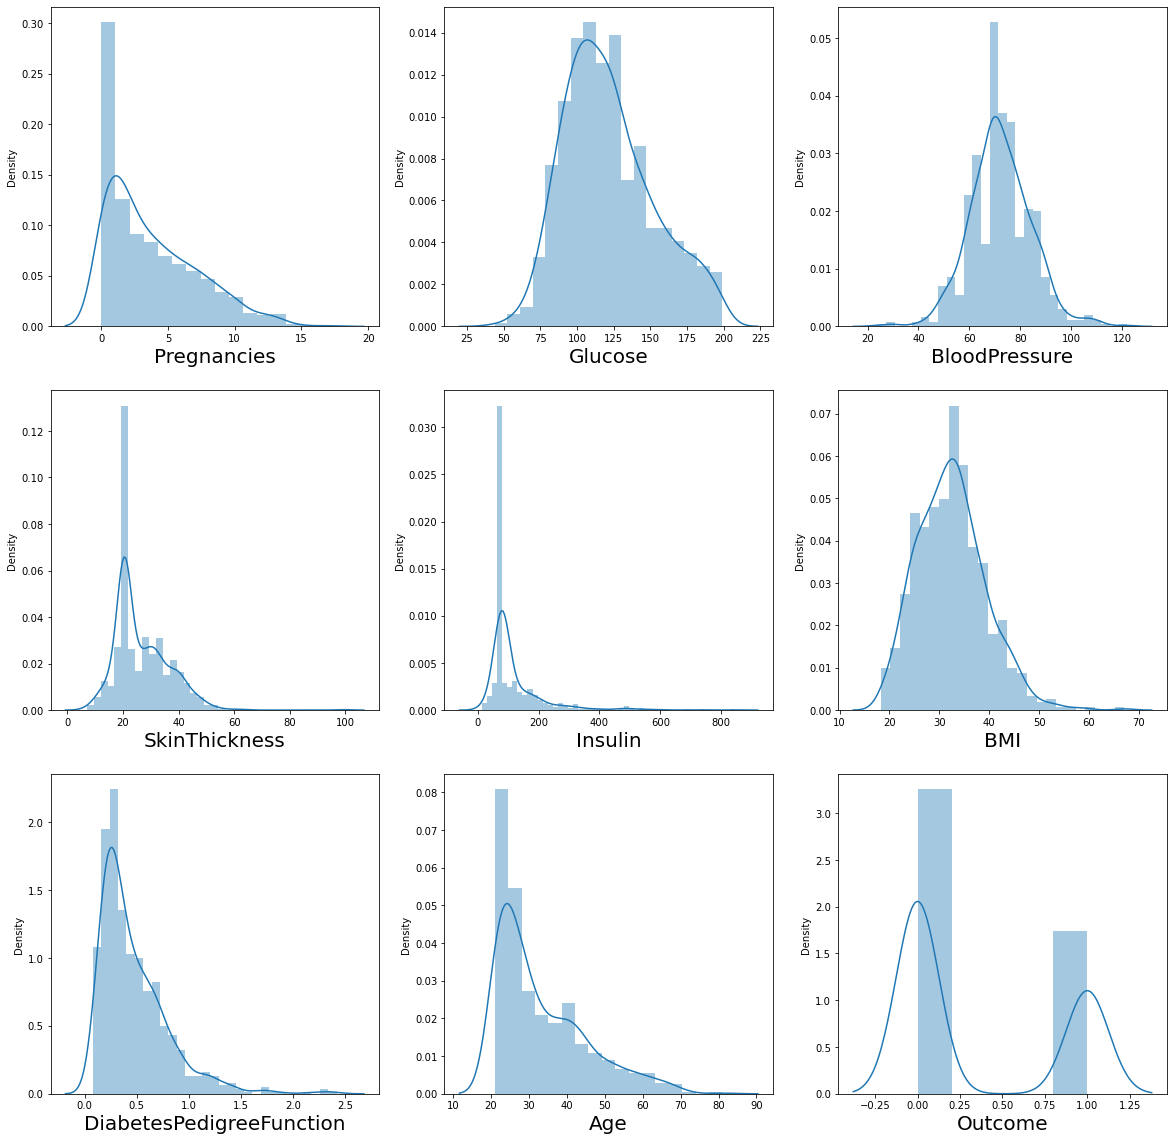

In [12]:
plt.figure(figsize = (20,20), facecolor = 'white')
pl = 1

for column in df:
    if pl<=9:
        ax = plt.subplot(3,3,pl)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    pl+=1
plt.show()

In [13]:
df_fea = df.drop('Outcome', axis = 1)

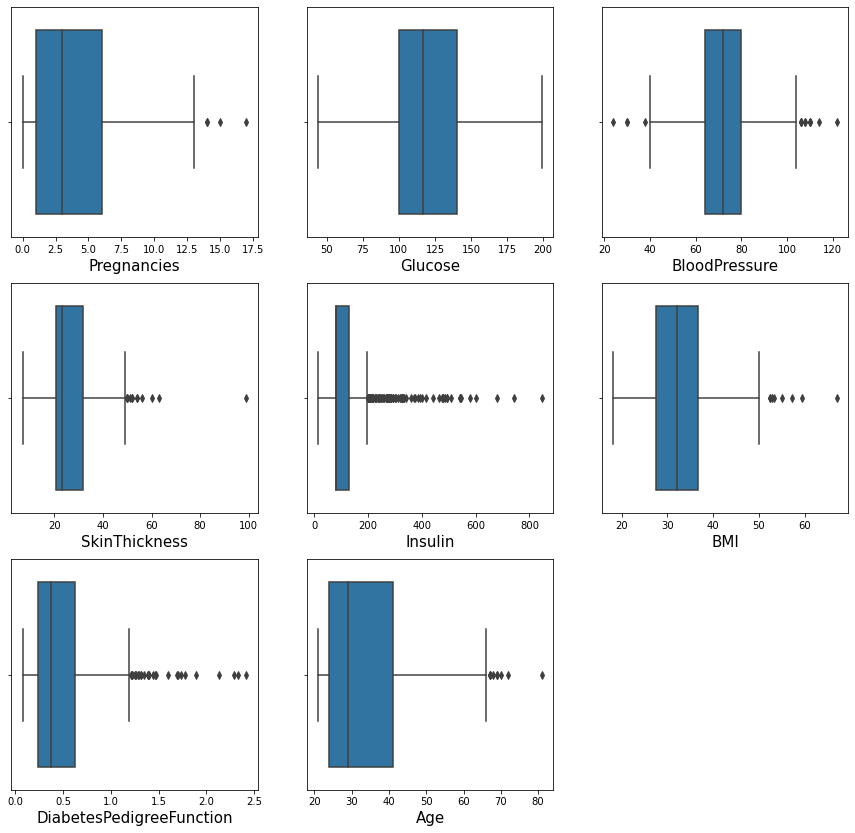

In [14]:
# plotting box plot to confirm the outliers 

plt.figure(figsize = (15,50))
gh = 1

for column in df_fea:
    if gh<=30:
        ax = plt.subplot(10,3,gh)
        sns.boxplot(df_fea[column],orient ='v')
        plt.xlabel(column,fontsize = 15)
    gh+=1
plt.show()

In [15]:
# 1st quantile
q1 = df.quantile(0.25)

# 3rd Quantile
q3 = df.quantile(0.75)

iqr = q3 - q1

In [16]:
preg = (q3.Pregnancies + (1.5 * iqr.Pregnancies))
print(preg)

index = np.where(df['Pregnancies'] > preg)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

13.5
(764, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
bp = (q3.BloodPressure + (1.5 * iqr.BloodPressure))
print(bp)

index = np.where(df['BloodPressure'] > bp)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
skt = (q3.SkinThickness + (1.5 * iqr.SkinThickness))
print(skt)

index = np.where(df['SkinThickness'] > skt)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
insu = (q3.Insulin + (1.5 * iqr.Insulin))
print(insu)

index = np.where(df['Insulin'] > insu)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
bmi = (q3.BMI + (1.5 * iqr.BMI))
print(bmi)

index = np.where(df['BMI'] > bmi)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
pdf = (q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print(pdf)

index = np.where(df['DiabetesPedigreeFunction'] > pdf)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

1.2
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
ag = (q3.Age + (1.5 * iqr.Age))
print(ag)

index = np.where(df['DiabetesPedigreeFunction'] >ag)

df = df.drop(df.index[index])
print(df.shape)

df.reset_index()

66.5
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


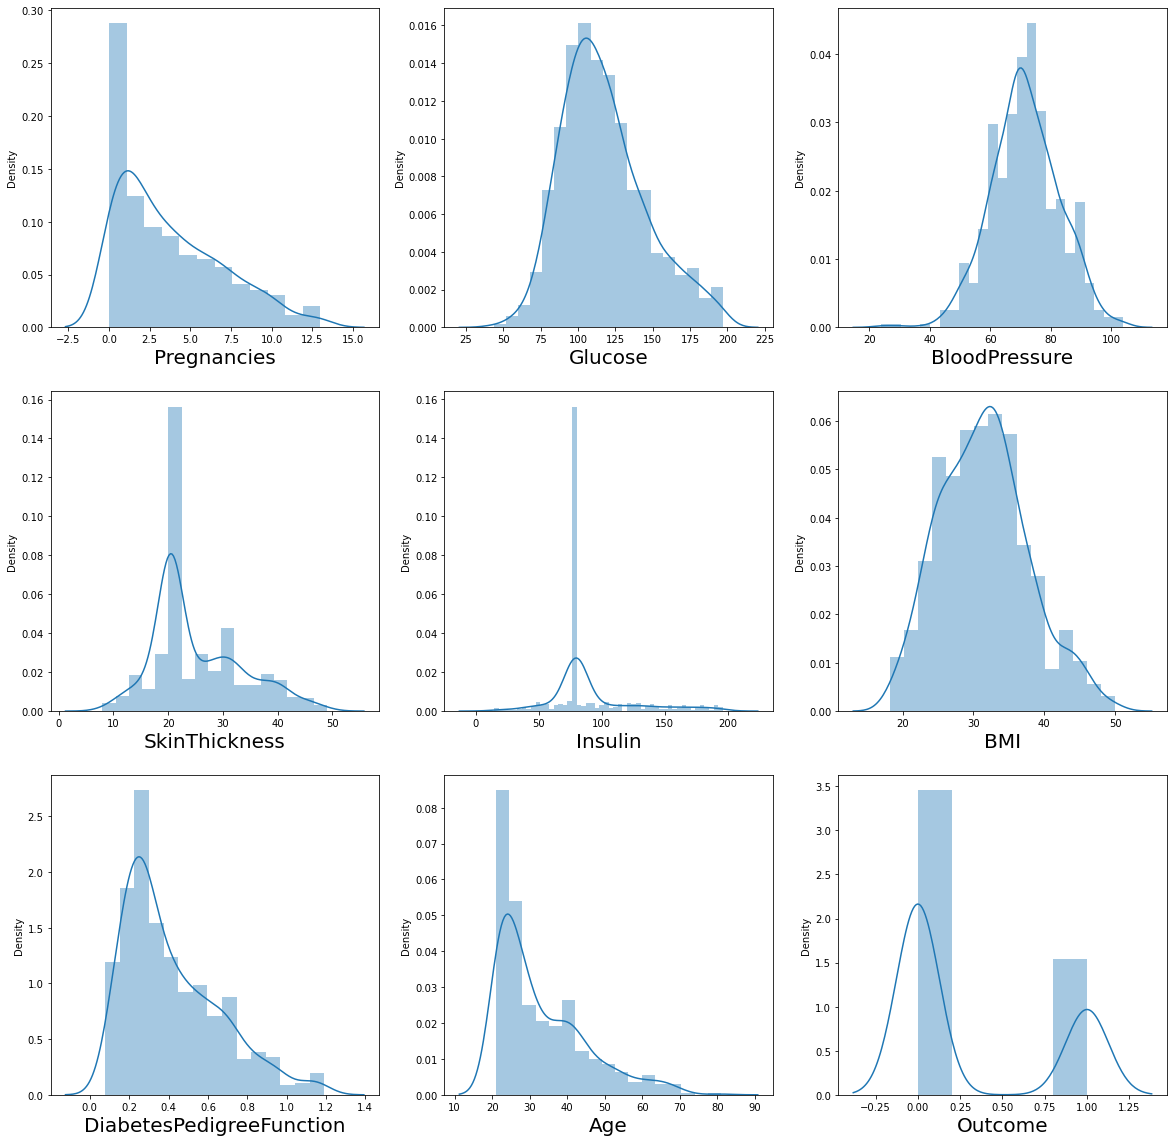

In [23]:
plt.figure(figsize = (20,20), facecolor = 'white')
pl = 1

for column in df:
    if pl<=9:
        ax = plt.subplot(3,3,pl)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    pl+=1
plt.show()

In [24]:
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

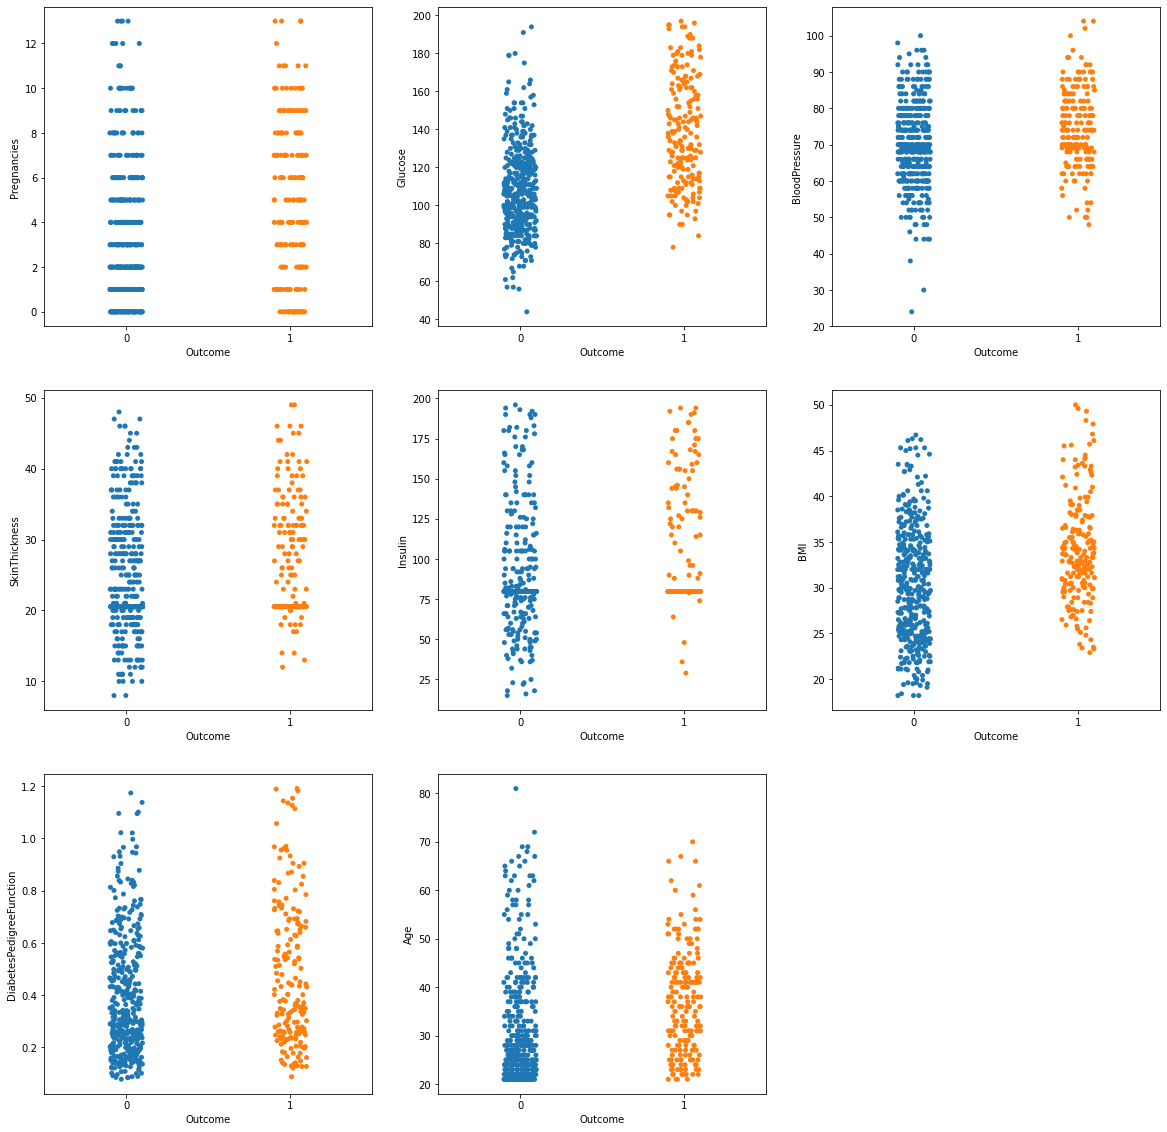

In [26]:
plt.figure(figsize = (20,20), facecolor = 'white')
plt_num = 1

for column in x:
    if plt_num<=9:
        ax = plt.subplot(3,3,plt_num)
        sns.stripplot(y,x[column])
    plt_num+=1
plt.show()

In [27]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [28]:
x_sc.shape[1]

8

In [29]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_sc,i) for i in range(x_sc.shape[1])]
vif['features'] = x.columns

vif

,vif,features
0,1.396033,Pregnancies
1,1.250111,Glucose
2,1.247999,BloodPressure
3,1.409933,SkinThickness
4,1.191874,Insulin
5,1.440890,BMI
6,1.035290,DiabetesPedigreeFunction
7,1.572207,Age


 There is no Co-linearity in between the features

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.25,random_state = 355)

In [40]:
Lr = LogisticRegression()

In [41]:
Lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred = Lr.predict(x_test)

In [48]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7911392405063291

In [50]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[95, 11],
       [22, 30]], dtype=int64)

In [52]:
auc = roc_auc_score(y_test,y_pred)
auc

0.7365747460087083

In [61]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [54]:
fpr

array([0.        , 0.10377358, 1.        ])

In [55]:
tpr

array([0.        , 0.57692308, 1.        ])

In [58]:
thresholds

array([2, 1, 0], dtype=int64)

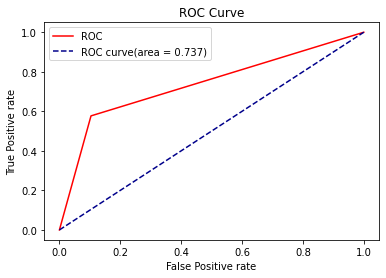

In [66]:
plt.plot(fpr,tpr,color = 'red',label = 'ROC')
plt.plot([0,1], [0,1],color = 'darkblue',linestyle = '--', label = 'ROC curve(area = %0.3f)'%auc)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()